# Posterior Predictive Distribution and Model Comparison

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az

In [62]:
DATA_PATH = "../data/msn_arrivals.csv"
msn_arrivals = pd.read_csv(DATA_PATH)

In [63]:
normal_data = az.from_json("../models/normal_data.json")
gumbel_data = az.from_json("../models/gumbel_data.json")

Recall, we are using 2 models to model the arrival delays


**Model 1**:

$$
\begin{aligned}
\mu &\sim \mathcal{N}(\mu=0, \sigma=40) \\
\sigma &\sim \mathcal{HT}(\nu=5, \mu=0, \sigma=60)\\
y &\sim \mathcal{N}(\mu, \sigma)
\end{aligned}
$$

**Model 2**:

$$
\begin{aligned}
\mu &\sim \mathcal{N}(\mu=0, \sigma=40) \\
\beta &\sim \mathcal{HT}(\nu=5, \mu=0, \sigma=60)\\
y &\sim \text{Gumbel}(\mu, \beta)\\
\end{aligned}
$$

## Posterior Predictive Distributions

d:\Research\Projects\Misc Experiments\Bayesian Modeling and Computation in Python\.venv\Lib\site-packages\arviz\plots\ppcplot.py:242: FutureWarning: color has been deprecated in favor of colors
  warnings.warn("color has been deprecated in favor of colors", FutureWarning)


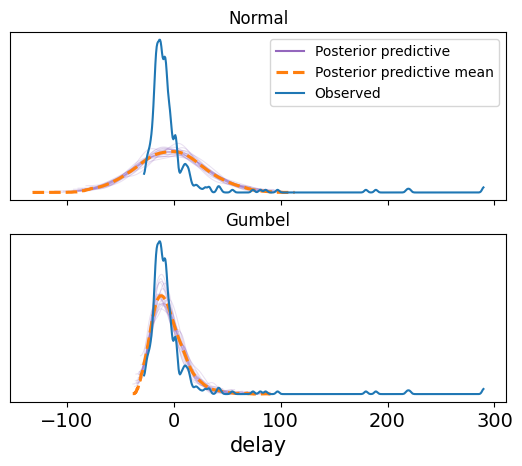

In [64]:
fig, ax = plt.subplots(2, 1, sharex=True)

az.plot_ppc(normal_data, observed=False, num_pp_samples=20, ax=ax[0], color="C4")
az.plot_kde(msn_arrivals.values.reshape(-1), ax=ax[0], label="Observed");

az.plot_ppc(gumbel_data, observed=False, num_pp_samples=20, ax=ax[1], color="C4")
az.plot_kde(msn_arrivals.values.reshape(-1), ax=ax[1], label="Observed");

ax[0].set_title("Normal")
ax[0].set_xlabel("")
ax[1].set_title("Gumbel")
ax[1].legend().remove()

**Normal Model**

(-) does not capture the long tail well 

(-) return more predictions below the bound of the observed data

**Gumbel Model**

(+) better fit 

(-) a poor job at predicting flights that arrive early

## Model Comparison

In [65]:
compare_dict = {"normal": normal_data,"gumbel": gumbel_data}
comp = az.compare(compare_dict, ic="loo")
comp

d:\Research\Projects\Misc Experiments\Bayesian Modeling and Computation in Python\.venv\Lib\site-packages\arviz\stats\stats.py:789: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
gumbel,0,-1410.219842,5.650474,0.000000,1.0,45.117877,0.000000,False,log
normal,1,-1653.616224,21.299654,243.396381,0.0,65.123322,27.407397,True,log


Gumbel model does better than the Normal model as shown above of the model ranked by their ELPD.

We can make the informed choice to proceed only with the Gumbel model.